## Assignment 2 Isaac Draft Submission

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Data

In [31]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [32]:
train_df.head()

,season,price_AUS,price_CHF,price_CZE,price_GER,price_ESP,price_FRA,price_UK,price_ITA,price_POL,price_SVK
0,spring,NaN,9.644028,-1.686248,-1.748076,-3.666005,NaN,-1.822720,-3.931031,NaN,-3.238197
1,summer,NaN,7.246061,-2.132377,-2.054363,-3.295697,-4.104759,-1.826021,NaN,NaN,-3.212894
2,autumn,-2.101937,7.620085,-1.910282,NaN,-3.388777,NaN,-2.034409,-4.073850,NaN,-3.114061
3,winter,-2.098475,8.411894,-1.903834,NaN,-3.588235,NaN,-2.214720,-4.018620,-2.330803,NaN
4,spring,-1.969687,8.926884,-1.697257,-1.331049,NaN,-3.911096,-2.388092,-4.093946,NaN,NaN


In [33]:
train_df.describe()

,price_AUS,price_CHF,price_CZE,price_GER,price_ESP,price_FRA,price_UK,price_ITA,price_POL,price_SVK
count,638.000000,631.000000,632.000000,631.000000,631.000000,636.000000,613.000000,634.000000,635.000000,619.000000
mean,-0.665411,4.538611,-0.221514,-0.421923,-4.737647,-2.914028,-1.518137,-2.686282,-0.296811,-0.643735
std,1.016447,3.328953,1.192286,1.155131,1.186441,1.102510,1.613119,1.150795,2.012512,2.093138
min,-2.362783,-3.736940,-2.147384,-2.238546,-6.891480,-4.428215,-3.940520,-4.330588,-2.912800,-3.499810
25%,-1.613550,2.640888,-1.522282,-1.633691,-5.688912,-3.884357,-2.643156,-3.737076,-2.354075,-2.923394
50%,-0.577244,3.872916,0.198743,-0.251429,-4.514822,-3.291359,-1.863632,-2.881648,-0.420106,-0.443855
75%,0.005234,7.736682,0.784038,0.646908,-3.603188,-2.025672,-0.270304,-1.817957,1.605009,1.536044
max,1.316798,9.933313,1.710173,1.659539,-2.858268,0.000619,1.624482,0.943226,3.421927,2.527192


In [34]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     900 non-null    object 
 1   price_AUS  638 non-null    float64
 2   price_CHF  631 non-null    float64
 3   price_CZE  632 non-null    float64
 4   price_GER  631 non-null    float64
 5   price_ESP  631 non-null    float64
 6   price_FRA  636 non-null    float64
 7   price_UK   613 non-null    float64
 8   price_ITA  634 non-null    float64
 9   price_POL  635 non-null    float64
 10  price_SVK  619 non-null    float64
dtypes: float64(10), object(1)
memory usage: 77.5+ KB


In [35]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   season     100 non-null    object 
 1   price_AUS  67 non-null     float64
 2   price_CZE  75 non-null     float64
 3   price_GER  69 non-null     float64
 4   price_ESP  61 non-null     float64
 5   price_FRA  75 non-null     float64
 6   price_UK   76 non-null     float64
 7   price_ITA  70 non-null     float64
 8   price_POL  65 non-null     float64
 9   price_SVK  66 non-null     float64
dtypes: float64(9), object(1)
memory usage: 7.9+ KB


## Visualizations

In [36]:
# Grouped for easier plotting
price_features = [["price_AUS", "price_CZE", "price_GER"], ["price_ESP", "price_FRA", "price_UK"], ["price_ITA", "price_POL", "price_SVK"]]

### Correlation with `price_CHF`

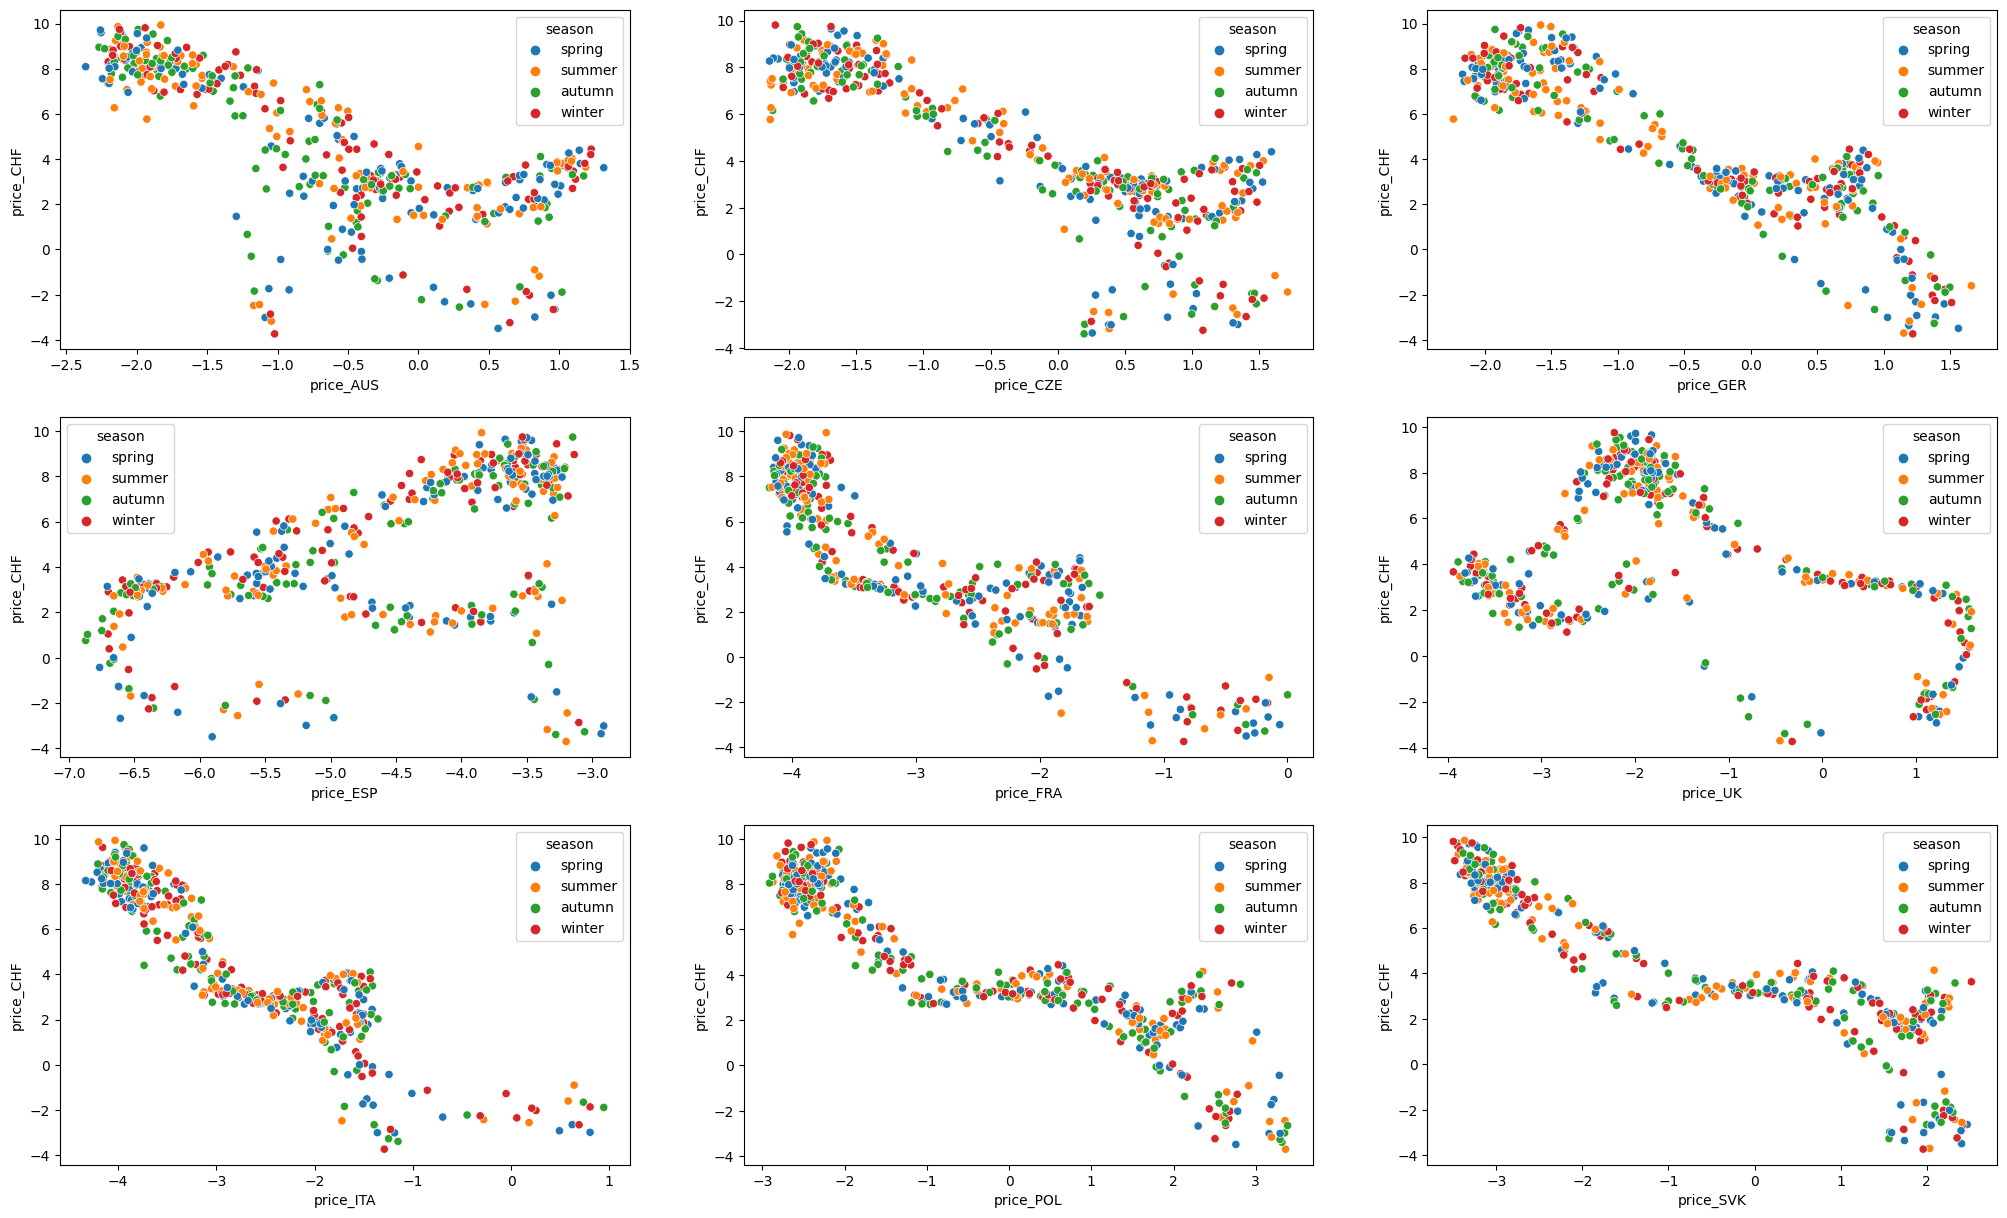

In [37]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
for i in range(3):
    for j in range(3):
        price_feature = price_features[i][j]
        sns.scatterplot(data=train_df, x=price_feature, y="price_CHF", hue="season", ax=ax[i, j])

plt.show()

So it seems that most countries have a negative correlation with the CHF price.    
Although AUS, ESP and UK exhibit more complex behaviour. We can try experimenting with   
not using the `price_AUS`, `price_ESP` and `price_UK` features.

### Seasonal Distribution

<Axes: xlabel='price_CHF', ylabel='Density'>

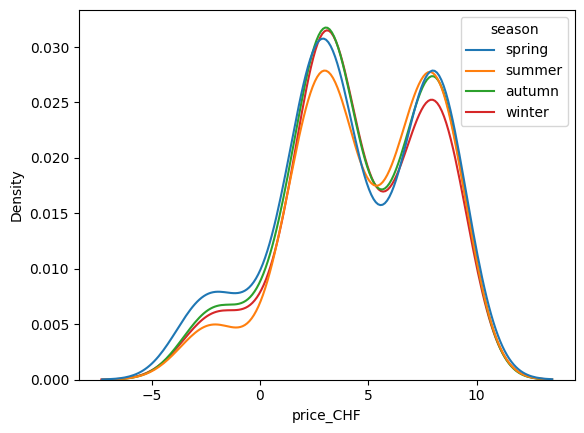

In [38]:
sns.kdeplot(data=train_df, x="price_CHF", hue="season")

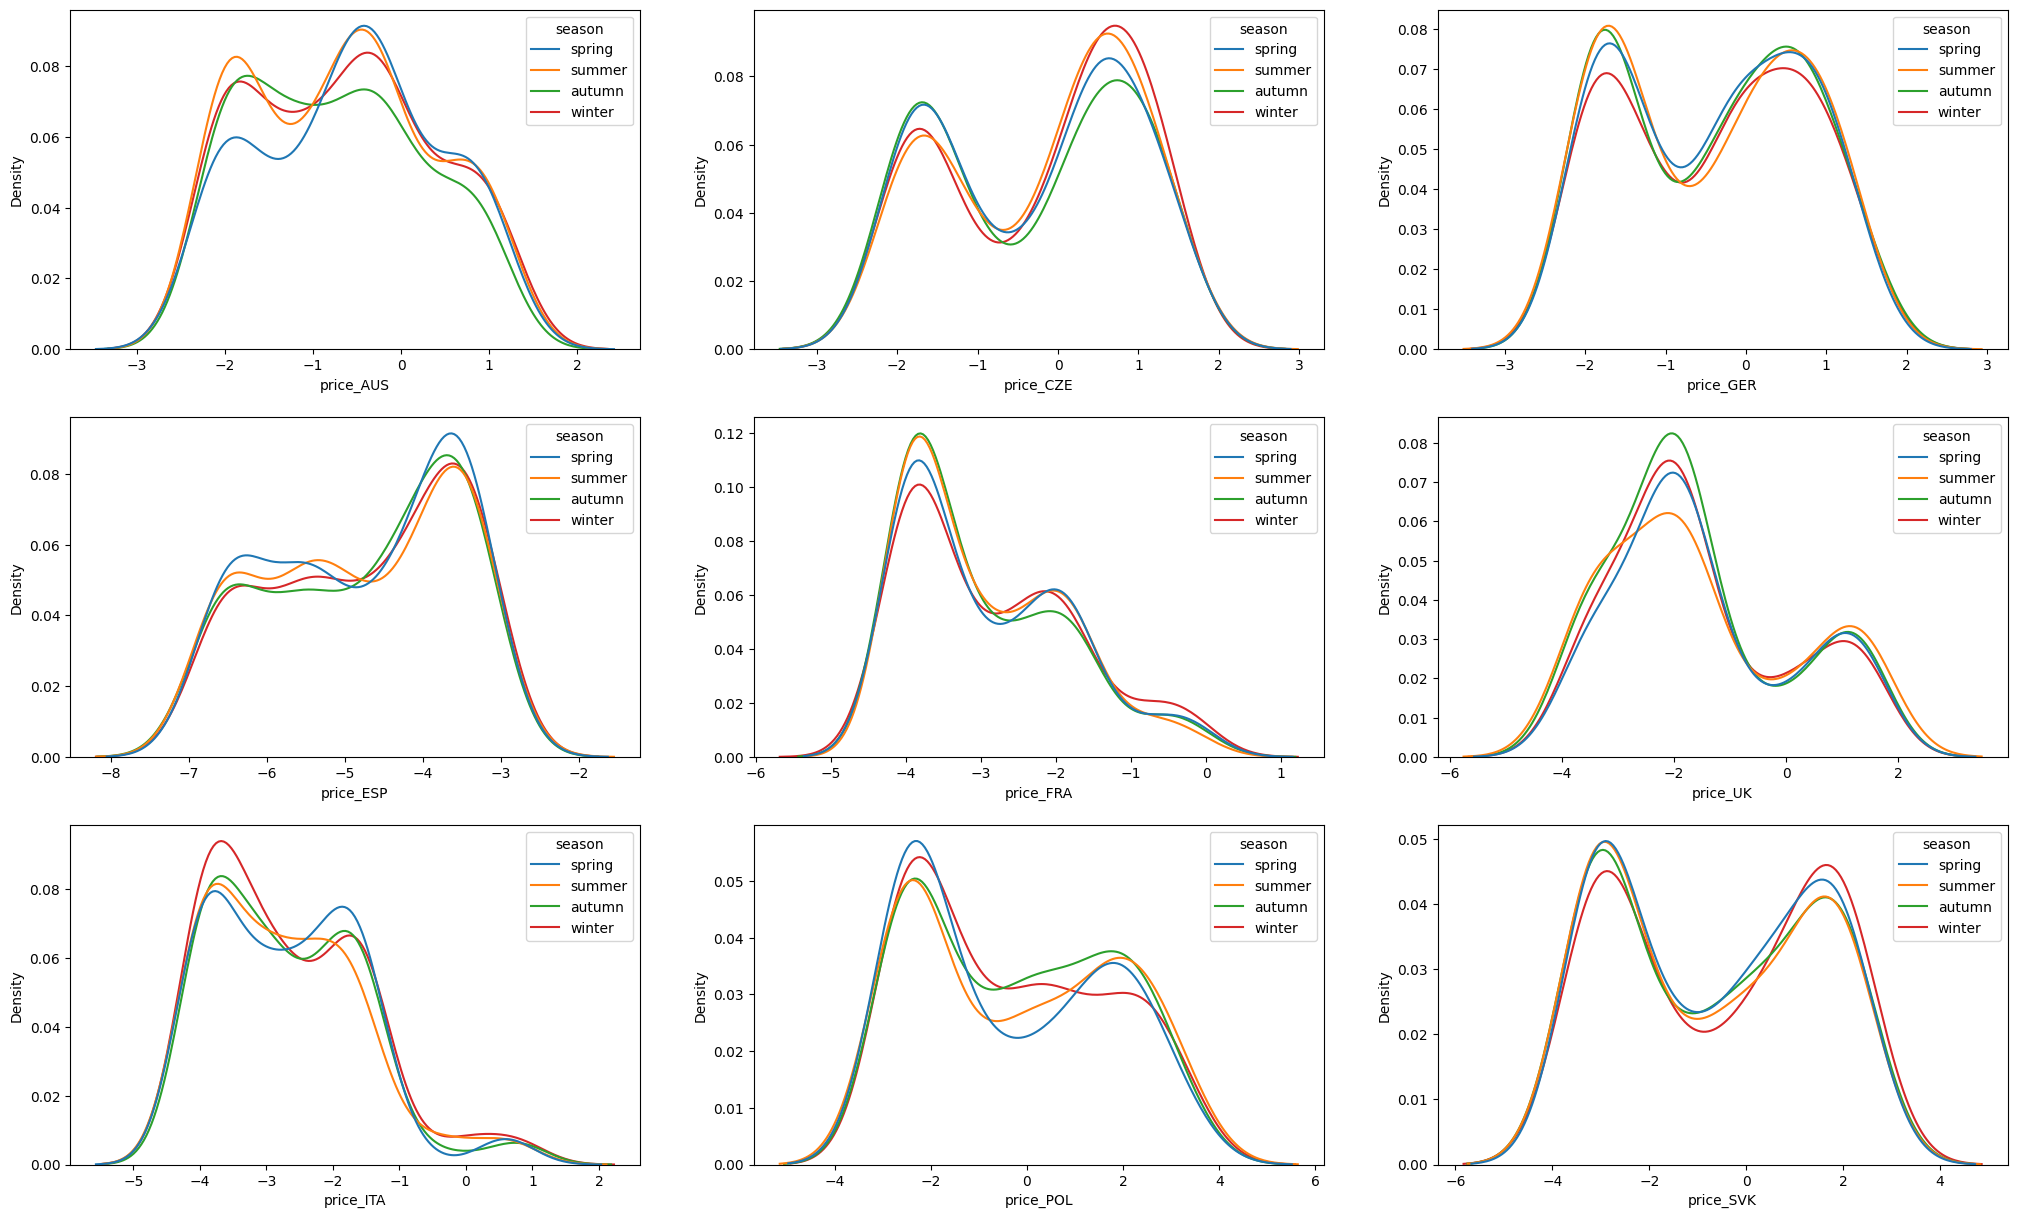

In [10]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
for i in range(3):
    for j in range(3):
        price_feature = price_features[i][j]
        sns.kdeplot(data=train_df, x=price_feature, ax=ax[i, j], hue="season")

plt.show()

So we see that the distributions of the data over each season are very similar, so we'll just drop the seasons.

## Distribution of Test Vs. Train

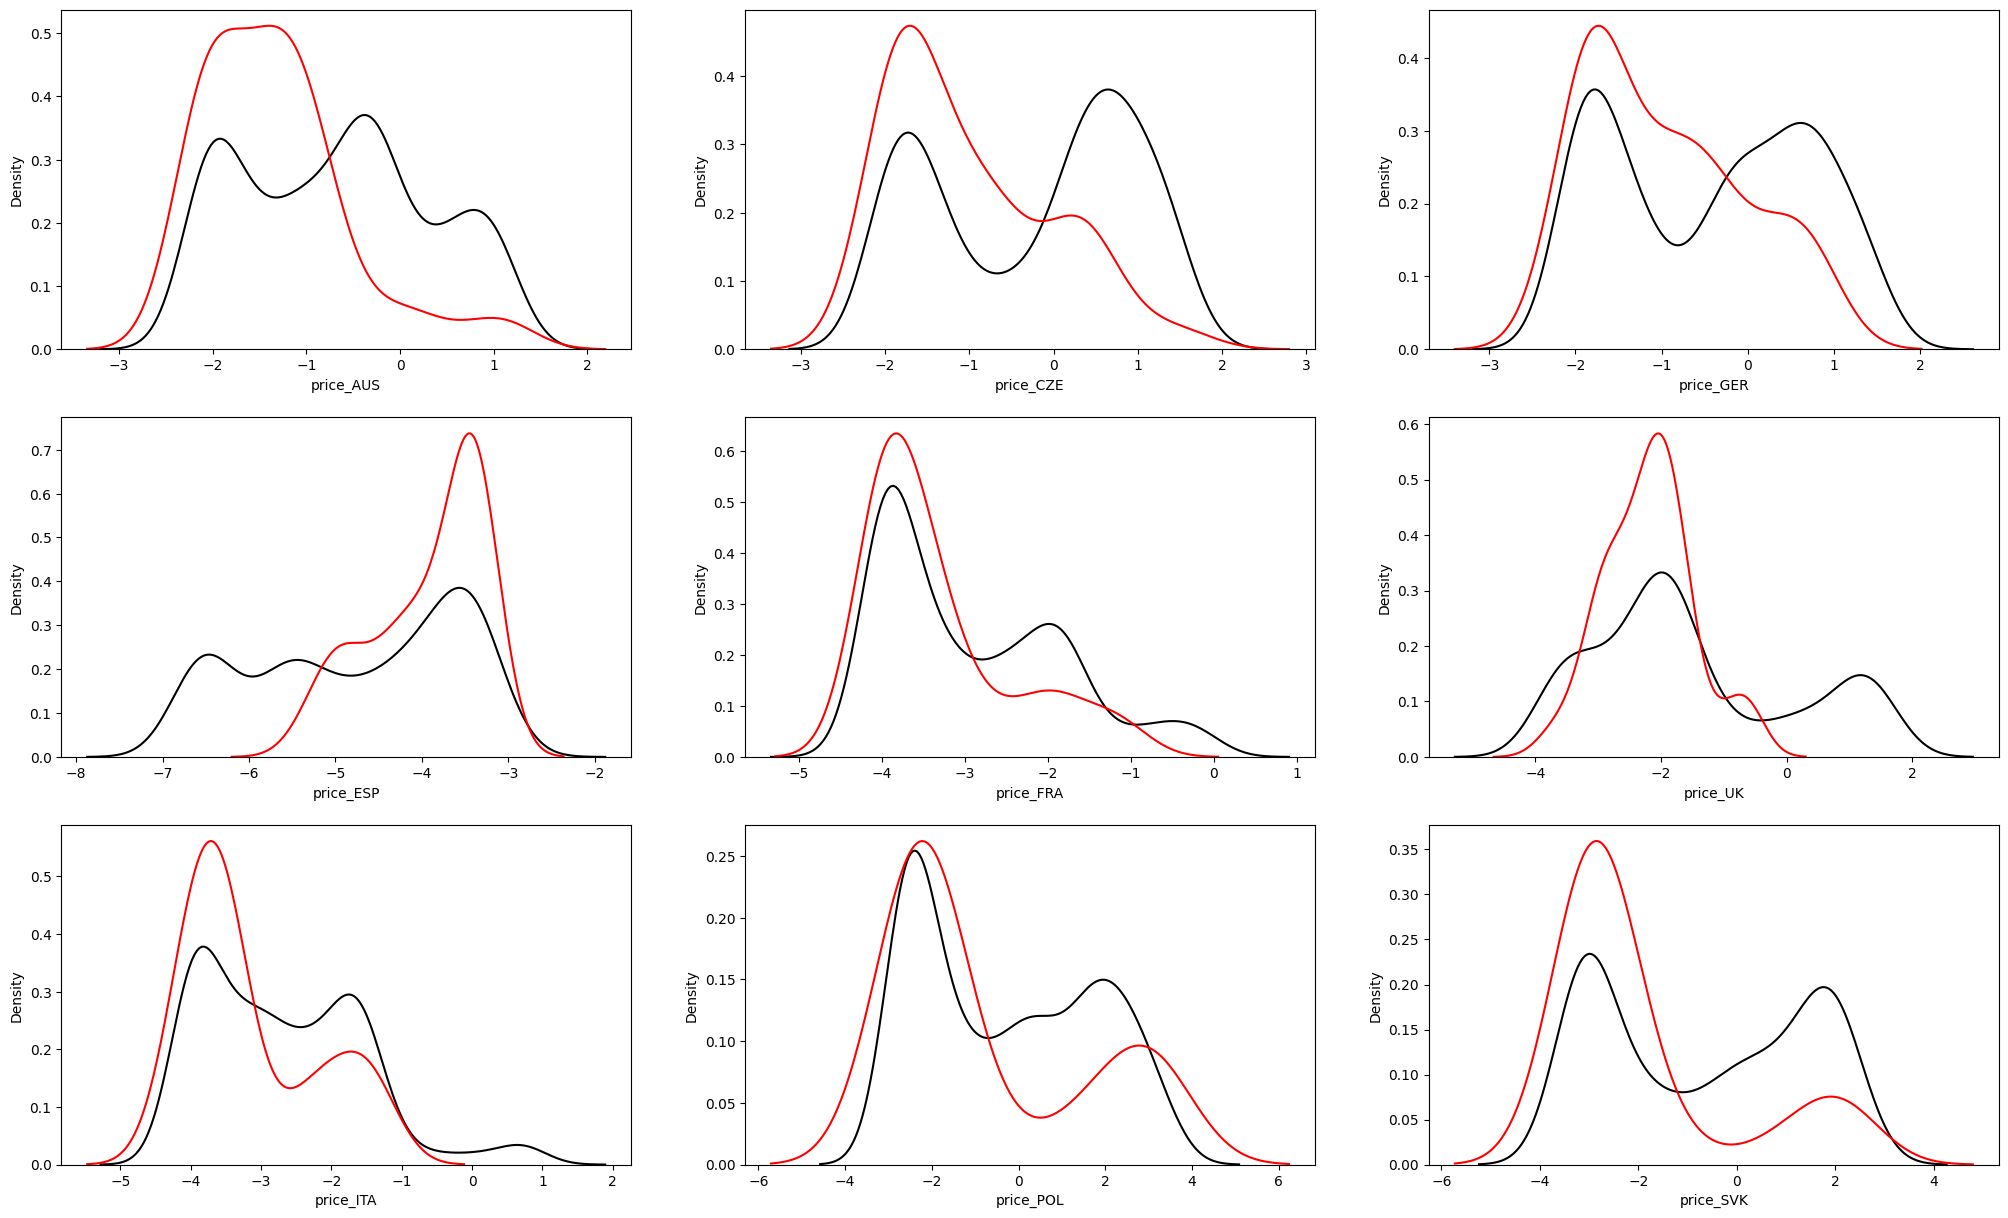

In [11]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
for i in range(3):
    for j in range(3):
        price_feature = price_features[i][j]
        sns.kdeplot(data=train_df, x=price_feature, ax=ax[i, j], color="black")
        sns.kdeplot(data=test_df, x=price_feature, ax=ax[i, j], color="red")

plt.show()

## Dealing with Missing Data
Ideally we would just drop missing data, but since all rows have atleast one different missing value, we can't do this.

In [9]:
# Percentage of data missing per feature
train_df.isna().sum() / train_df.count()

season       0.000000
price_AUS    0.410658
price_CHF    0.426307
price_CZE    0.424051
price_GER    0.426307
price_ESP    0.426307
price_FRA    0.415094
price_UK     0.468189
price_ITA    0.419558
price_POL    0.417323
price_SVK    0.453958
dtype: float64

We see that around 42% of `price_CHF` is missing. We could impute this, however we would be using other similar values to do this, therefore this would not give us any new signal/information
so instead we just drop rows with missing `price_CHF`:

In [10]:
train_df.dropna(subset=["price_CHF"], inplace=True)

#### Approach 1: Mean Imputation

In [11]:
# Dealing with missing values
train_df.fillna(train_df.mean(), inplace=True)
test_df.fillna(test_df.mean(), inplace=True)


/tmp/ipykernel_876851/36298877.py:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.fillna(train_df.mean(), inplace=True)
/tmp/ipykernel_876851/36298877.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df.fillna(test_df.mean(), inplace=True)


In [12]:
# Percentage of data missing per feature
train_df.isna().sum() / train_df.count()

season       0.0
price_AUS    0.0
price_CHF    0.0
price_CZE    0.0
price_GER    0.0
price_ESP    0.0
price_FRA    0.0
price_UK     0.0
price_ITA    0.0
price_POL    0.0
price_SVK    0.0
dtype: float64

#### Approach 2: KNN Imputation
**Idea:** impute values based on the mean values of their neighbours, when sorted by `price_CHF`, i.e we find similarly distributed values.

In [14]:
# KNN Impute train df
k = 6
train_df.sort_values(by="price_CHF", inplace=True)
cols = ["price_AUS", "price_CZE", "price_GER", "price_ESP", "price_FRA", "price_UK", "price_ITA", "price_POL", "price_SVK"]
for col in cols:
    na_mask = train_df[col].isna()
    train_df.loc[na_mask, col] = train_df[col].rolling(window=k, min_periods=1).mean()[na_mask]

# Drop the remaining nan values caused by window calculations
train_df.dropna(inplace=True)

In [15]:
# Percentage of data missing per feature
train_df.isna().sum() / train_df.count()

season       0.0
price_AUS    0.0
price_CHF    0.0
price_CZE    0.0
price_GER    0.0
price_ESP    0.0
price_FRA    0.0
price_UK     0.0
price_ITA    0.0
price_POL    0.0
price_SVK    0.0
dtype: float64

**Note:** Imputing the test_df is a bit harder, since we don't have `price_CHF` to base our imputations off of.  
Therefore we will use the training data as a reference.

In [16]:
# KNN Impute test_df, using the values in train_df
test_df["is_train"] = 0
train_df["is_train"] = 1
combined_df = pd.concat([test_df, train_df])
combined_df.sort_values(by=cols, inplace=True)

for col in cols:
    na_mask = combined_df[col].isna()
    combined_df.loc[na_mask, col] = combined_df[col].rolling(window=k, min_periods=1).mean()[na_mask]

# Drop the remaining nan values caused by window calculations
test_df = combined_df.loc[combined_df["is_train"] == 0, :]
test_df

,season,price_AUS,price_CZE,price_GER,price_ESP,price_FRA,price_UK,price_ITA,price_POL,price_SVK,is_train,price_CHF
31,winter,-2.321117,-1.976963,-1.800516,-3.429074,-4.115879,-1.964513,-4.272177,-2.407580,-3.112621,0,NaN
84,spring,-2.241943,-1.811676,-1.772848,-3.424183,-4.032112,-2.156429,-3.927666,-2.261067,-3.144566,0,NaN
88,spring,-2.238849,-2.135457,-1.772848,-3.544568,-4.045882,-2.117879,-3.931172,-2.747374,-3.193524,0,NaN
87,winter,-2.189685,-1.991825,-1.672559,-3.491931,-4.010947,-2.049773,-3.875831,-2.398114,-2.889597,0,NaN
90,autumn,-2.177212,-2.044232,-1.835039,-3.272274,-4.020020,-2.040936,-4.096333,-2.430334,-3.184834,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
67,winter,NaN,0.940894,-0.513743,-5.130225,-3.293521,-2.978334,-3.217156,-1.420579,-1.965196,0,NaN
19,winter,NaN,1.408803,0.814674,-4.840109,-1.829922,-2.871307,-1.385705,1.479627,1.389497,0,NaN
79,winter,NaN,NaN,-0.478408,-4.008246,-3.735418,-2.374269,-4.013601,-2.271975,-2.866934,0,NaN
82,autumn,NaN,NaN,-0.312875,-3.451053,-3.798521,-2.001108,-4.030197,-2.281012,-2.969549,0,NaN


In [17]:
# Just fill the remaining values with mean values
test_df["price_CZE"] = test_df["price_CZE"].fillna(test_df["price_CZE"].mean())

/tmp/ipykernel_870521/3038685532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df["price_CZE"] = test_df["price_CZE"].fillna(test_df["price_CZE"].mean())


In [18]:
# Percentage of data missing per feature
test_df.isna().sum() / test_df.count()

season       0.000000
price_AUS    0.388889
price_CZE    0.000000
price_GER    0.000000
price_ESP    0.000000
price_FRA    0.000000
price_UK     0.000000
price_ITA    0.000000
price_POL    0.000000
price_SVK    0.000000
is_train     0.000000
price_CHF         inf
dtype: float64

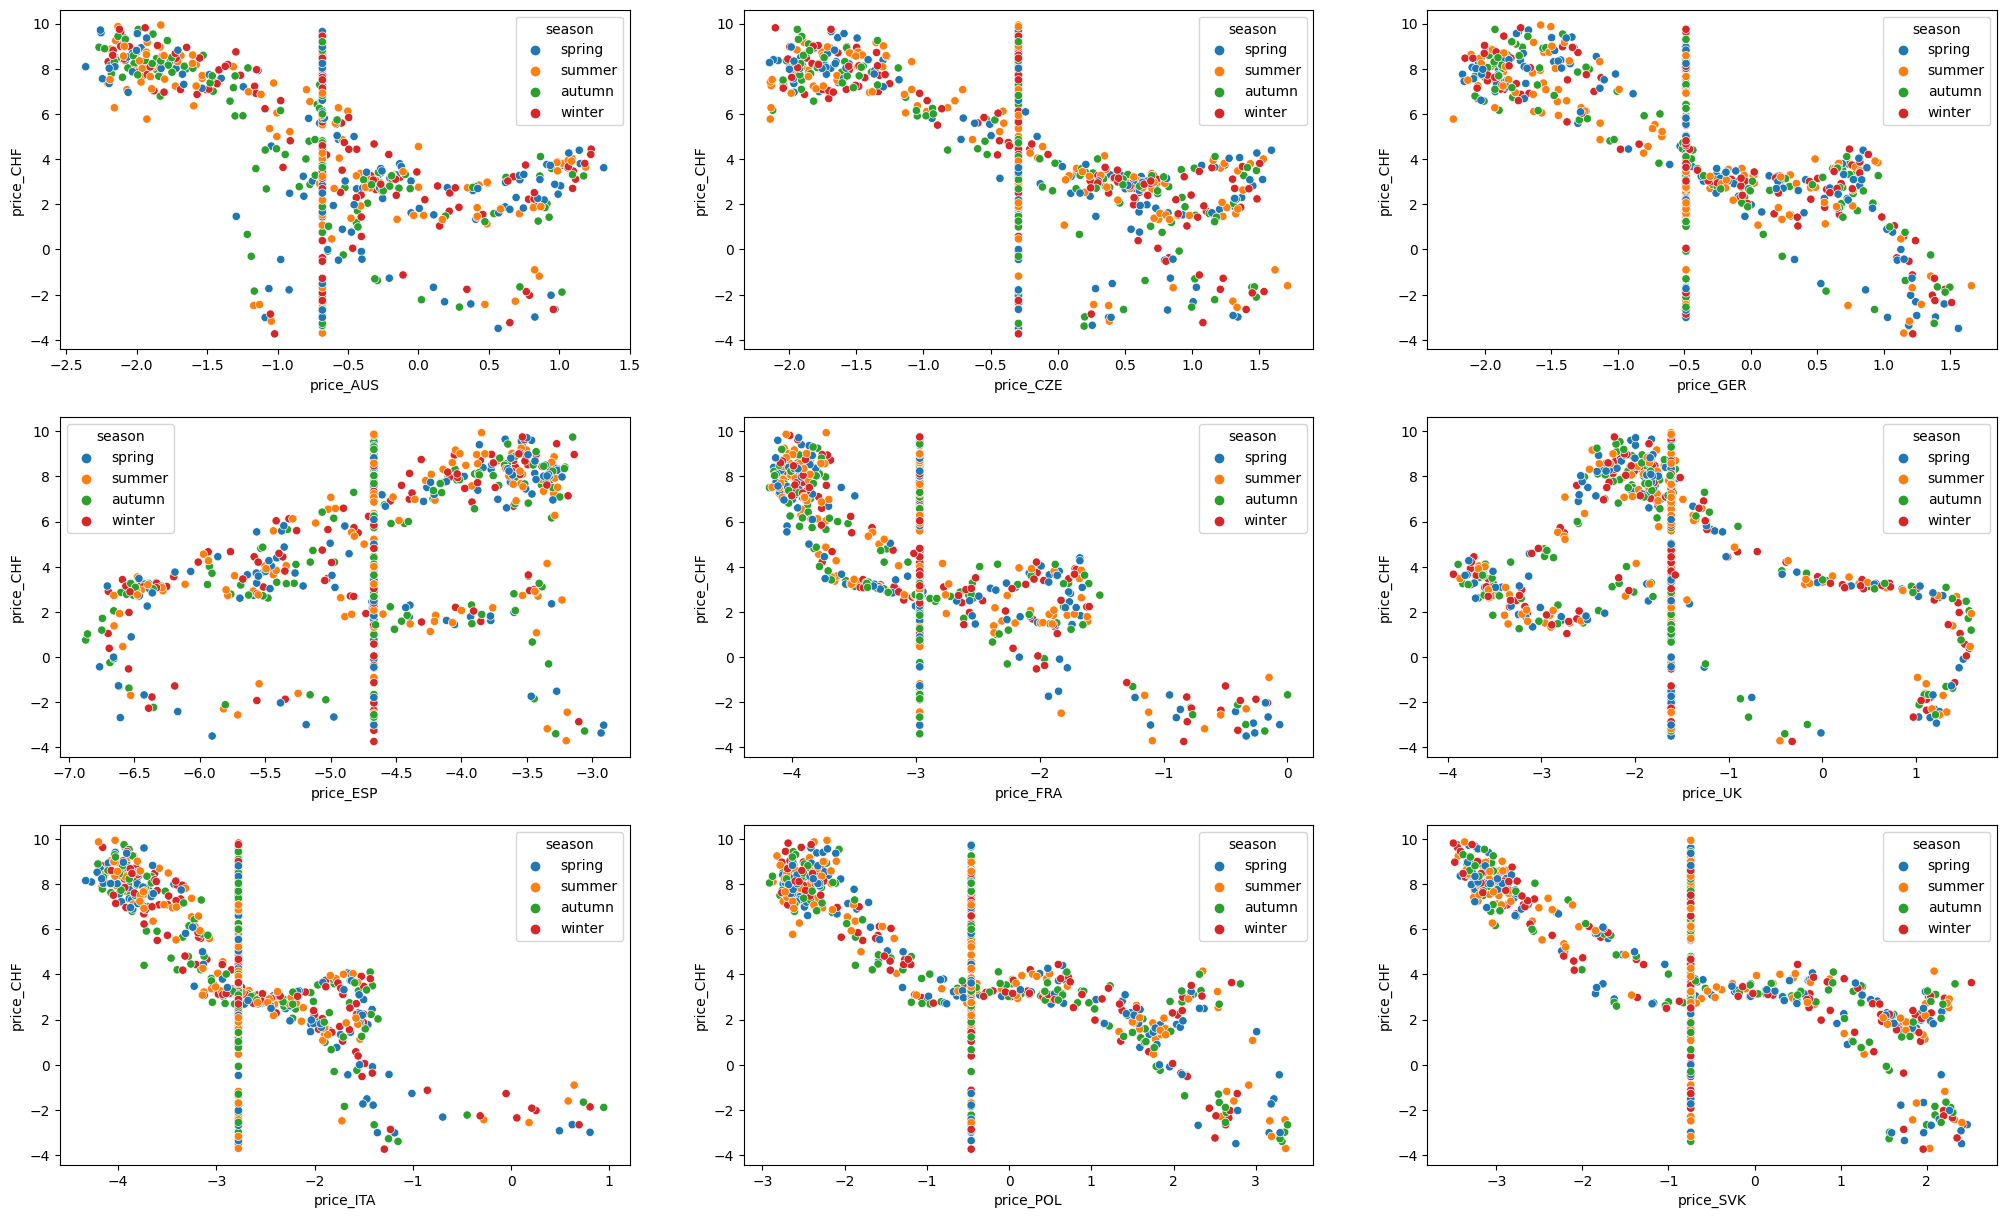

In [13]:
price_features = [["price_AUS", "price_CZE", "price_GER"], ["price_ESP", "price_FRA", "price_UK"], ["price_ITA", "price_POL", "price_SVK"]]
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
for i in range(3):
    for j in range(3):
        price_feature = price_features[i][j]
        sns.scatterplot(data=train_df, x=price_feature, y="price_CHF", hue="season", ax=ax[i, j])

plt.show()

## Dropping Columns
We experiment with dropping some country price data that is not well correlated and also the seasonal features.

In [20]:
train_df.drop(columns=["price_UK", "price_ESP", "price_AUS", "season", "is_train"], inplace=True)
test_df.drop(columns=["price_UK", "price_ESP", "price_AUS", "season", "is_train", "price_CHF"], inplace=True)

/tmp/ipykernel_870521/2873411005.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=["price_UK", "price_ESP", "price_AUS", "season", "is_train", "price_CHF"], inplace=True)


## Onehot Encoding

In [14]:
# Onehot encode categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

### Converting to Numpy Arrays
We convert to numpy arrays and normalize the values to avoid overflow errors.

In [15]:
X_train = train_df.copy()
y_train = X_train.pop("price_CHF")
# Scale all values between 0 and 1
X_train = X_train.apply(lambda x: (x - min(x)) / (max(x) - min(x)), axis=0)

X_train = np.array(X_train)
X_test = np.array(test_df.apply(lambda x: (x - min(x)) / (max(x) - min(x)), axis=0))
y_train = np.array(y_train)

## Kernelized Ridge Regression
**Useful video**: [video](https://www.youtube.com/watch?v=wBVSbVktLIY&list=PLNeUaaanNc9QaGqVTs4bFoys5nt-T-3FF)

$$
\bf{y}_{\text{pred}} = K_x((K + I \lambda)^{-1})^T \bf{y}_{\text{train}}
$$
Where:
$$
[K]_{ij} = k(\bf{x}_{\text{train}, i}, \bf{x}_{\text{train}, j})
$$
$$
[K_x]_{ij} = k(\bf{x}_{\text{test}, i}, \bf{x}_{\text{train}, j})
$$

### Gaussian kernel
$$
K(X_{\text{train}}, \sigma)_{i,j} = \exp\left(\frac{-1}{2 \sigma^2} ||\bf{x}_i - \bf{x}_j||^2\right)
$$

$$

$$

In [16]:
# Demo of Numpys broadcasting tricks
x = np.array([1, 2, 3])
y = np.array([-1, -2, -3])
x[:, None] + y[None, :]

array([[ 0, -1, -2],
       [ 1,  0, -1],
       [ 2,  1,  0]])

In [17]:
# Note: ||x-y||^2 = ||x||^2 + ||y||^2 - 2 * x^T * y
sigma = 3
a = -1 / (2 * sigma**2)
X_norm = np.sum(X_train**2, axis=-1)
K = np.exp(a * X_norm[:, None] + X_norm[None, :] - 2 * X_train @ X_train.T)
K_x = np.exp(a * np.sum(X_test**2, axis=-1)[:, None] + np.sum(X_train**2, axis=-1)[None, :] - 2 * X_test @ X_train.T)

### Marten (RBF) Kernel
The class of Matern kernels is a generalization of the `RBF`. It has an additional parameter $\nu$ which controls the smoothness of the resulting function. The smaller $\nu$, the less smooth the approximated function is.      
As $\nu\rightarrow\infty$, the kernel becomes equivalent to the `RBF` kernel. When $\nu = 1/2$, the Matérn kernel becomes identical to the absolute exponential kernel. Important intermediate values are $\nu=1.5$ (once differentiable functions)  
and $\nu=2.5$ (twice differentiable functions).  

$$
    k(x_i, x_j) =  \frac{1}{\Gamma(\nu)2^{\nu-1}}\Bigg(
    \frac{\sqrt{2\nu}}{l} d(x_i , x_j )
    \Bigg)^\nu K_\nu\Bigg(
    \frac{\sqrt{2\nu}}{l} d(x_i , x_j )\Bigg)
$$

Where 
- $d(\cdot,\cdot)$ is the Euclidean distance,
- $K_{\nu}(\cdot)$ is a modified Bessel function and
- $\Gamma(\cdot)$ is the gamma function.



## Inference

In [19]:
# This doesn't currently work, I think my derivation might be wrong
I = np.identity(K.shape[0])
lam = 1.0
y_pred = K_x @ np.linalg.inv(K + lam * I).T @ y_train

## 1D Results

In [20]:
train_df_1d = train_df["price_POL"][:, None]

/tmp/ipykernel_876851/1571652764.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  train_df_1d = train_df["price_POL"][:, None]


In [27]:
from sklearn.kernel_ridge import KernelRidge
krr = KernelRidge(alpha=1.0, kernel="poly", degree=4)
krr.fit(train_df_1d, y_train)

KernelRidge(alpha=1.0, degree=4, kernel='poly')

In [28]:
y_train_pred = krr.predict(train_df_1d)
train_df["y_train_pred"] = y_train_pred

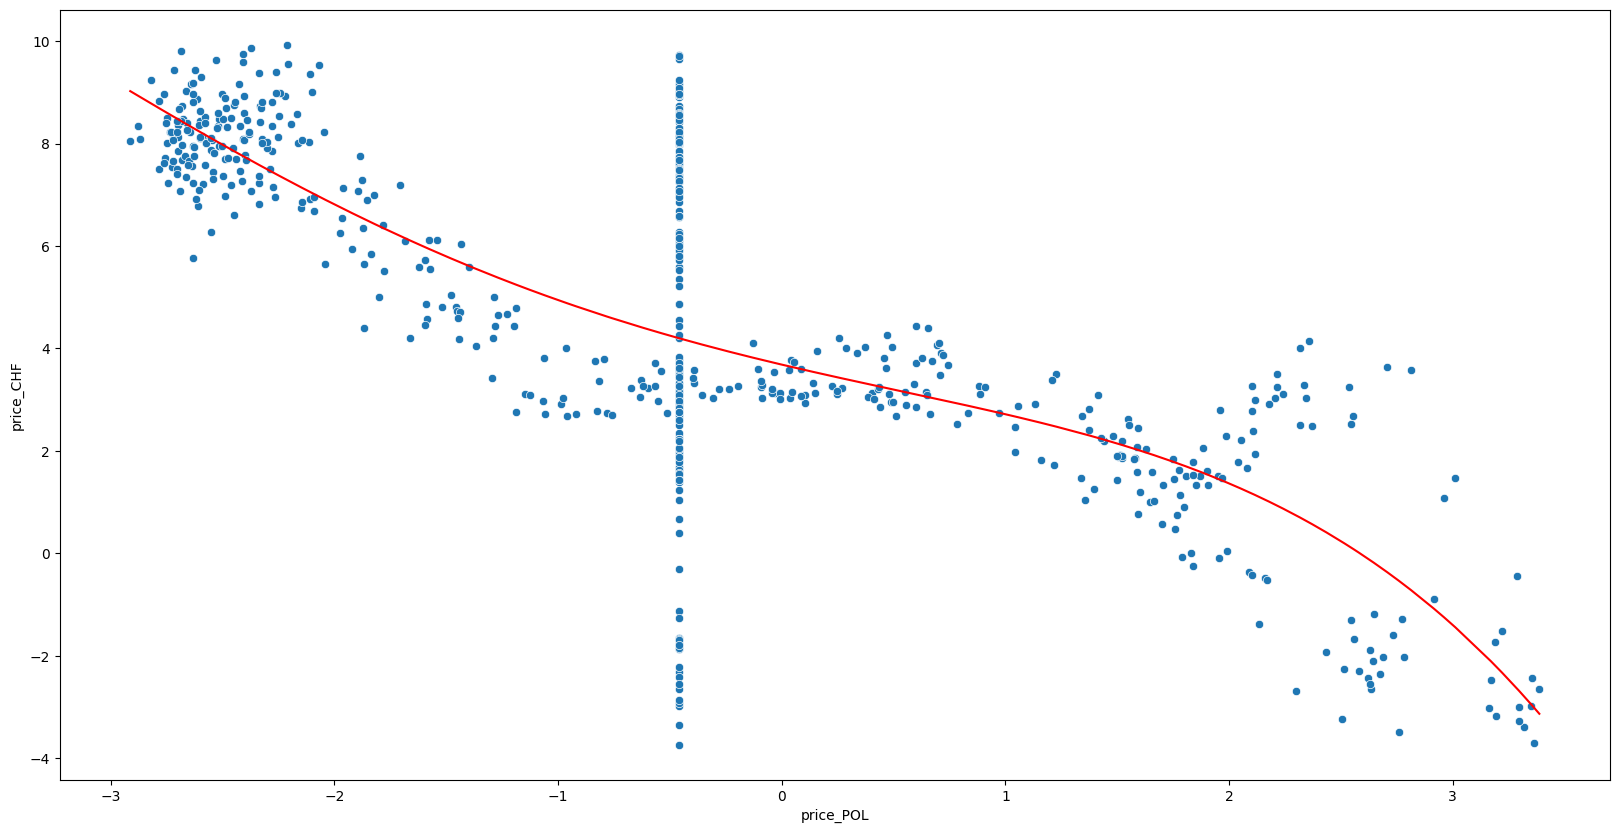

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
g1 = sns.scatterplot(data=train_df, x="price_POL", y="price_CHF", ax=ax)
g2 = sns.lineplot(data=train_df, x="price_POL", y="y_train_pred", ax=ax, color="red")
